In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("C:/Users/Admin/Downloads/Multiple_type_regression_on_same_problem_and_assignment_2/Multiple type regression on same problem and assignment/Asignment Build similar notebook on this data/Real estate (1).csv",index_col=0)

In [42]:
df=pd.DataFrame(data)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

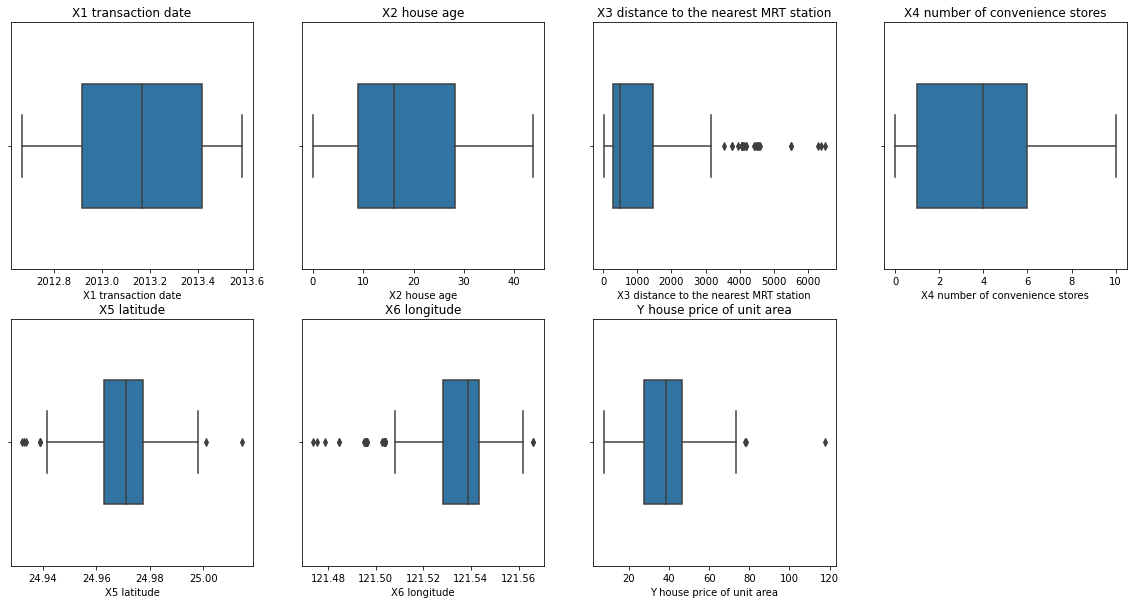

In [53]:
plt.figure(figsize=(20,10))
plotnumber=1
for i in df:
    if plotnumber<=7:
        ex=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[i],width=0.5)
        plt.title(i)
    plotnumber +=1
plt.show()

After analyzing the real estate dataset using box plots,it was found that columns X3 (distance to the nearest MRT station),X5 (latitude),and X6 (longitude) contain minimal outlier presence.However, upon closer inspection, these outliers were determined to hold negligible significance in providing actionable insights for the retail dataset.

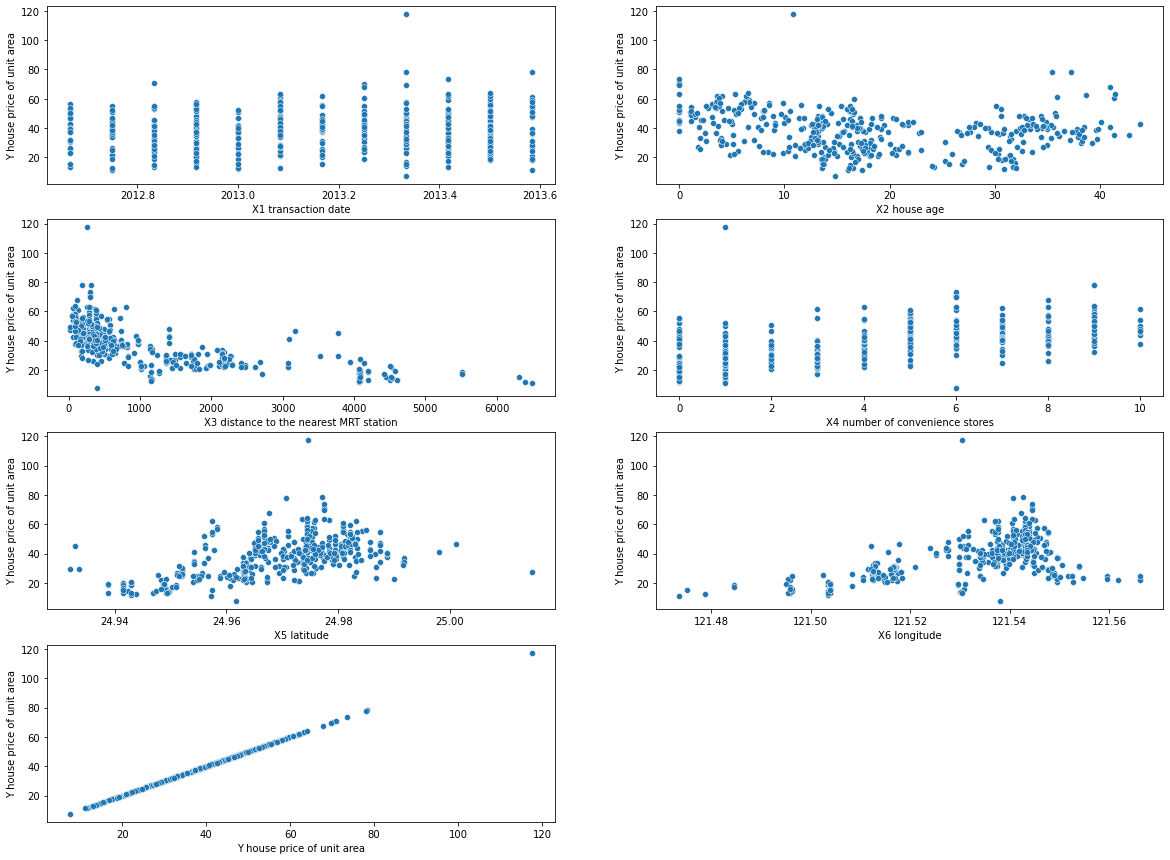

In [49]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in df:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.scatterplot(x=df[i],y=df['Y house price of unit area'])
    plotnumber +=1
plt.show()

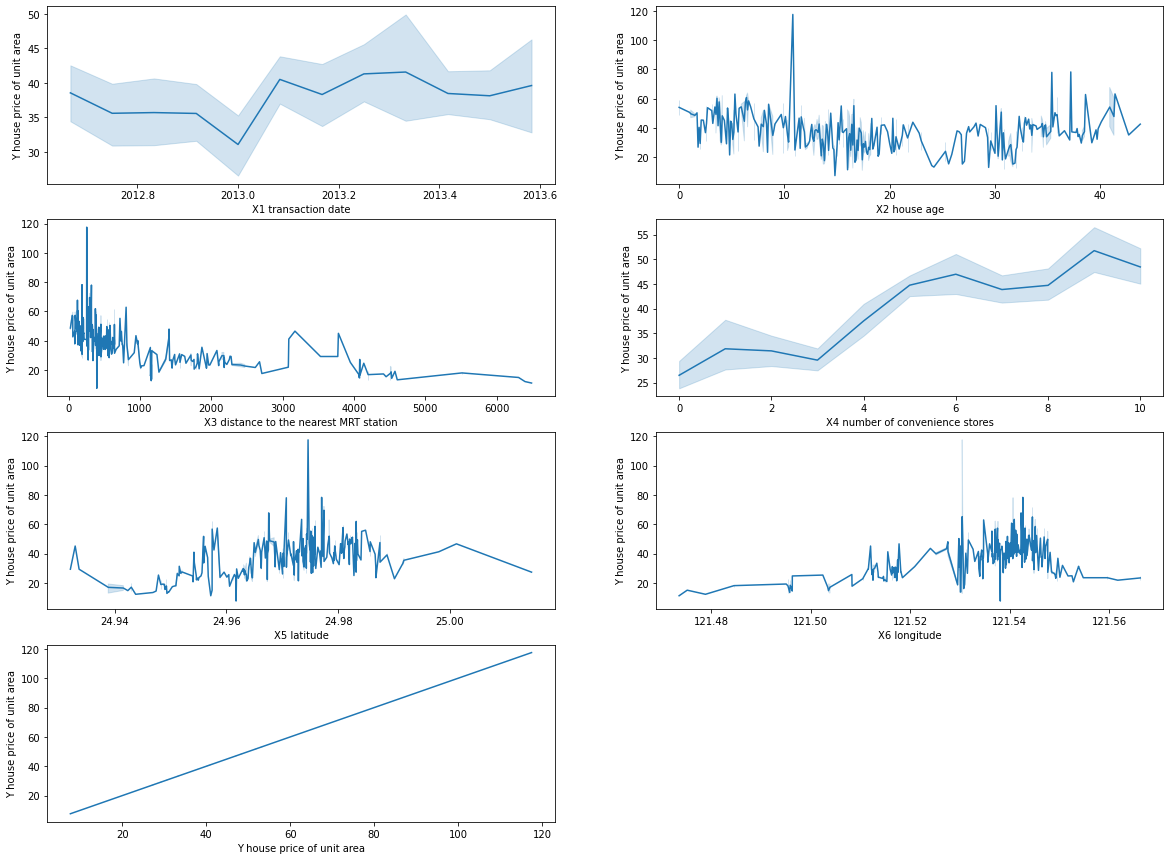

In [56]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in df:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.lineplot(x=df[i],y=df['Y house price of unit area'])
    plotnumber +=1
plt.show()

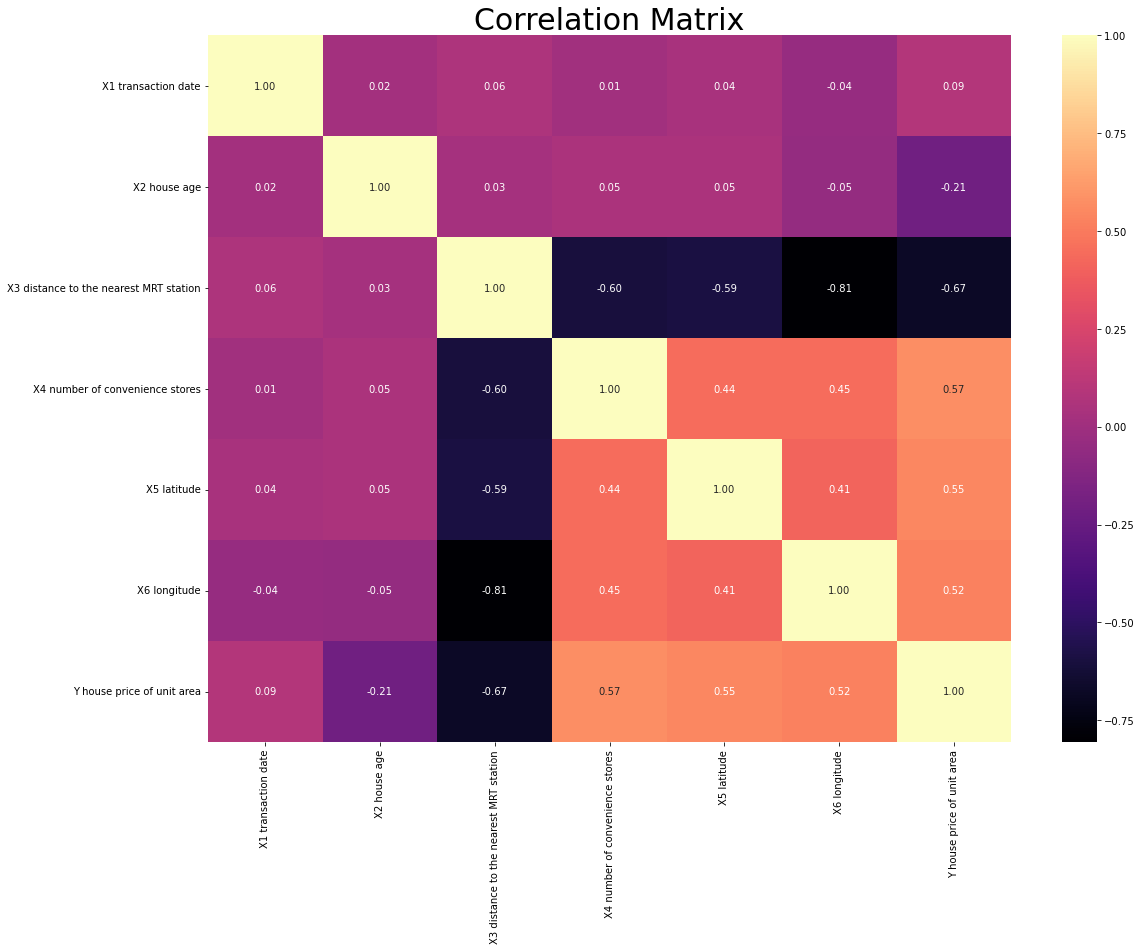

In [57]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=30)
plt.show(block=True)

# STEP1: Initialize different regression model

# A. Linear regression :


In [4]:
from sklearn.linear_model import LinearRegression
def linear_model(X_train,Y_train):
    print("Linear Regression")
    linear_regression=LinearRegression()
    linear_regression.fit(X_train,Y_train)
    return linear_regression
    

# B. Regularization Technique:

# 1. Lasso Regression:

In [5]:
from sklearn.linear_model import Lasso
def loss_model(X_train,Y_train):
    print("Lasso Regression")
    lasso_regression=Lasso(alpha=0.8,max_iter=10000)
    lasso_regression.fit(X_train,Y_train)
    return lasso_regression
        

# 2.Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
def ridge_model(X_train,Y_train):
    print("Ridge Regression")
    ridge_regression=Ridge(alpha=0.9,max_iter=None)
    ridge_regression.fit(X_train,Y_train)
    return ridge_regression

# C. SGD Regression

In [7]:
from sklearn.linear_model import SGDRegressor

In [8]:
def SGD_model(X_train,Y_train):
    print("SGD Regression")
    SGD_regression=SGDRegressor(max_iter=2000)
    SGD_regression.fit(X_train,Y_train)
    return SGD_regression

# step2: Train and Test the Module

In [58]:
def build_and_train_model(df,target_name,reg_fn):
    X=df.drop(target_name,axis=1)
    Y=df[target_name]
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
    model=reg_fn(X_train,Y_train)
    score=model.score(X_train,Y_train)
    print("Training Score: ",score)
    Y_pred=model.predict(X_test)
    r_score=r2_score(Y_test,Y_pred)
    print("Testing Score: ",r_score)
    return {'model':model,
           'X_train':X_train,'Y_train':Y_train,
            'X_test':X_test,'Y_test':Y_test,
            'Y_pred':Y_pred
           }

In [59]:
linear_reg=build_and_train_model(df,'Y house price of unit area',linear_model)

Linear Regression
Training Score:  0.5581197274607068
Testing Score:  0.6810580555095943


1.This Training score:0.558,represent the performance on training data,it indicates that approximately 55.81% of the variance in the target variable(Y) explained by independant variable(X).

(if training score of 1.0 would indicate a perfect fit,where the model perfectly predicts the target variable for the training data.)

2.This Testing score:0.681,represents the performance on unseen data (the testing dataset). It indicates that approximately 68.11% of the variance in the target variable can be explained by the independent variables in the testing dataset.

(you want the testing score to be close to the training score, indicating that the model is not overfitt(performing well on training data but poorly on testing data)or underfitt(performing poorly on both training and testing data).)

In [22]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=LinearRegression(fit_intercept=True)
model1=model.fit(X_train,Y_train)

Text(0.5, 0, 'Y_test')

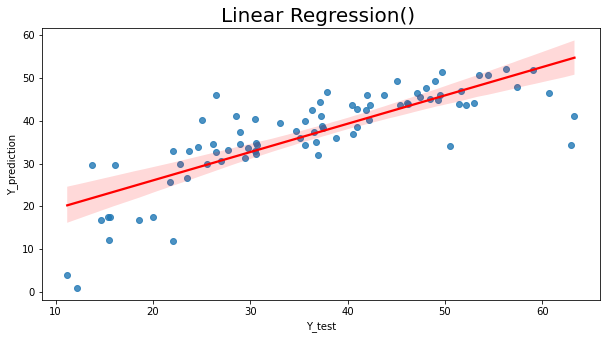

In [36]:
Y_pred=model.predict(X_test)
plt.figure(figsize=(10,5))
sns.regplot(x=Y_test,y=Y_pred,line_kws=dict(color="r"))
plt.title("Linear Regression() ",fontsize=20)
plt.ylabel('Y_prediction')
plt.xlabel('Y_test')

 The provided scores suggest that the linear regression model performs moderately well ,but not indicate as perfectly best fitting line .However, there is still room for improvement, especially if higher predictive accuracy is desired.

In [60]:
loss_reg=build_and_train_model(df,'Y house price of unit area',loss_model)

Lasso Regression
Training Score:  0.5139706088993963
Testing Score:  0.6459686645963595


1.This Training score indicates that approximately 51.40% of the variance in the target variable(Y)explained by independant variable.

(Since Lasso regression applies regularization,the training score tends to be lower compared to (OLS) regression,as it trades off some training accuracy for better generalization.)

2.Testing score indicates that approximately 64.60% of the variance in the target variable can be explained by the independent variables in the testing dataset.

(the testing score for Lasso regression might also be lower compared to OLS regression, but it should still provide a reasonable estimate of the model's generalization performance.)

In [25]:
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X,Y,test_size=0.2,random_state=42)
modela=Lasso(alpha=0.8,max_iter=10000)
result=modela.fit(X1_train,Y1_train)

Text(0.5, 0, 'Y_test')

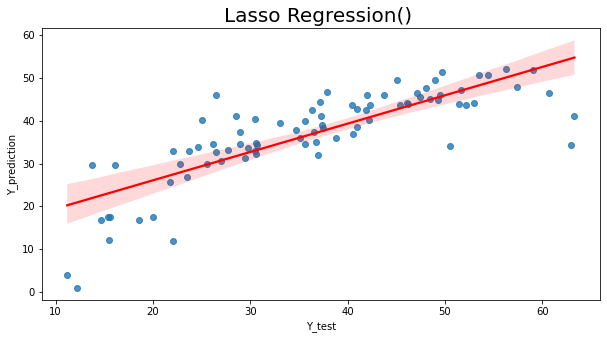

In [35]:
Y_pred=modela.predict(X1_test)
plt.figure(figsize=(10,5))
sns.regplot(x=Y1_test,y=Y_pred,line_kws=dict(color="r"))
plt.title("Lasso Regression() ",fontsize=20)
plt.ylabel('Y_prediction')
plt.xlabel('Y_test')

 the Lasso regression model performs moderately well.However,there is potential for further improvement or fine-tuning.

In [61]:
ridge_reg=build_and_train_model(df,'Y house price of unit area',ridge_model)

Ridge Regression
Training Score:  0.5306975331992294
Testing Score:  0.6669436690508309


1.This Training score indicates that approximately 53.07% of the variance in the target variable explained by independant variable in training dataset.

(Ridge regression applies regularization, which generally results in a lower training score compared to (OLS) regression, as it trades off some training accuracy for better generalization and reduces overfitting Problem.) 

2.This testing score indicates that approximately 66.69% of the variance in the target variable can be explained by the independent variables in the testing dataset.

(The testing score for Ridge regression provides an estimate of how well the model generalizes to new, unseen data. Ideally, you want the testing score to be close to the training score, indicating that the model is not overfitting or underfitting.)

In [39]:
X2_train, X2_test, Y2_train, Y2_test=train_test_split(X,Y,test_size=0.2,random_state=42)
modelb=Ridge(alpha=0.9)
result=modelb.fit(X2_train,Y2_train)

Text(0.5, 0, 'Y_test')

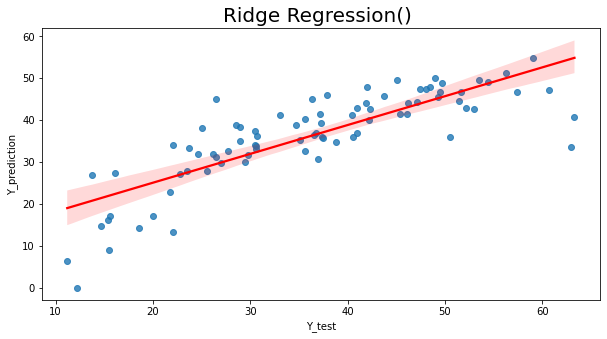

In [40]:
Y_pred1=modelb.predict(X1_test)
plt.figure(figsize=(10,5))
sns.regplot(x=Y1_test,y=Y_pred1,line_kws=dict(color="r"))
plt.title("Ridge Regression() ",fontsize=20)
plt.ylabel('Y_prediction')
plt.xlabel('Y_test')

the Ridge regression model performs moderately well,However further optimization or exploration of different techniques may be warranted.

In [13]:
SGD_reg=build_and_train_model(data,'Y house price of unit area',SGD_model)

SGD Regression
Training Score:  -1.4629088996616116e+28
Testing Score:  -1.602698927895026e+28


In [17]:
X=data[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
Y=data['Y house price of unit area']